## Die Gleichverteilung auf \[-1, 1\]

$$
X \sim \text{Uniform}(-1, 1)
$$

$$
f(x) = \begin{cases}
\frac{1}{2} & -1 \leq x \leq 1\\
0 & \text{otherwise}
\end{cases} \\
$$

Die Dichtefunktion dieser Verteilung ist konstant in $[-1, 1]$ und ist gleich null ausserhalb dieses Intervalls.

Text(0, 0.5, 'Dichte')

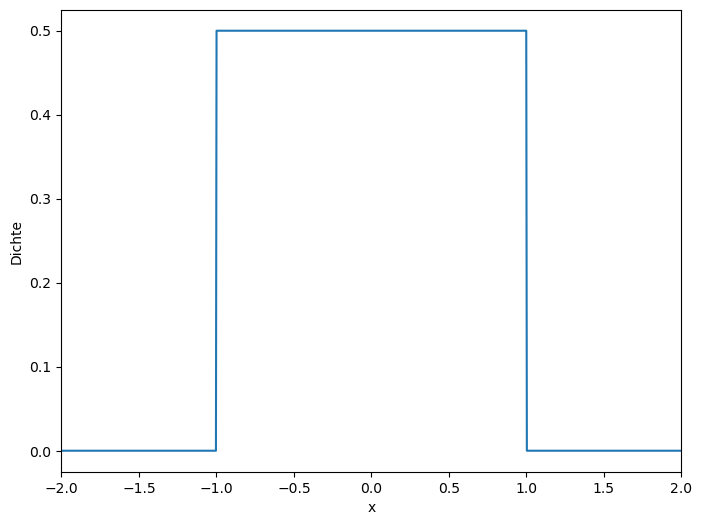

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Define the range of x
x = np.linspace(-2, 2, 1000)

# Calculate the density of the uniform distribution
y = stats.uniform.pdf(x, loc=-1, scale=2)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlim([-2, 2])
plt.xlabel('x')
plt.ylabel('Dichte')

In [3]:
# Dieses zieht 10 Zufallszahlen aus einer Gleichverteilung auf dem Intervall [-1, 1]

x_unif = np.random.uniform(low=-1, high=1, size=10)
x_unif

array([-0.45062637,  0.88318321, -0.30099181, -0.46408309,  0.88517674,
       -0.06831232, -0.36189104, -0.89519402,  0.21311998,  0.29259135])

In [4]:
# Wie viele der Zufallszahlen sind kleiner als 0? Hinweis: benutzen Sie den logischen Operator <

np.sum(x_unif < 0)

# Wie viele der Zufallszahlen befinden sich im Intervall [0, 0.5]? Hinweis: benutzen Sie die logischen Operatoren < und >.
# Sie können die beiden logischen Operatoren auch kombinieren, indem Sie den Operator & (logisches AND) verwenden.
# Benutzen Sie np.sum, um die Anzahl der Zufallszahlen zu zählen, die die Bedingung erfüllen.

np.sum((x_unif > 0) & (x_unif < 0.5))

2

In [5]:
# Der folgende Code berechnet die Wahrscheinlichkeit, dass das Ereignis X < 0 eintritt. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

stats.uniform.cdf(0, loc=-1, scale=2)

# Der folgende Code berechnet die Wahrscheinlichkeit, dass das Ereignis X < 0.5 eintritt (under der Gleichverteilung auf [-1, 1]).

stats.uniform.cdf(0, loc=-1, scale=2)

# Berechnen Sie die Wahrscheinlichkeit, dass das Ereignis X > 0.5 eintritt.

1 - stats.uniform.cdf(0.5, loc=-1, scale=2)

# Berechnen Sie die Wahrscheinlichkeit, dass das Ereignis X im Intervall [0, 0.5] eintritt.

stats.uniform.cdf(0.5, loc=-1, scale=2) - stats.uniform.cdf(0, loc=-1, scale=2)

# Vergleichen Sie diese Wahrscheinlichkeit mit der Anzahl der Werte in der Simulation, die im Intervall [0, 0.5] liegen.

np.sum((x_unif > 0) & (x_unif < 0.5))

2

## Die Normalverteilung

Die Familie der Normalverteilungen wird durch zwei Parameter definiert: den Erwartungswert $\mu$ und die Standardabweichung $\sigma$. Die Dichte der Normalverteilung ist gegeben durch die Formel:


$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Weil wir diese Verteilung sehr oft benutzen werden, führen wir eine spezielle Notation für die Normalverteilung ein:

$$
X \sim N(\mu, \sigma^2)
$$

In dieser Notation bedeutet $X$ ist normalverteilt mit Erwartungswert $\mu$ und Varianz $\sigma^2$. Sie brauchen die Formel für die Dichte der Normalverteilung nicht auswendig zu lernen, allerdings müssen Sie wissen, wie die Dichte in Abhängigkeit von den Parametern $\mu$ und $\sigma$ aussieht.

$$
\begin{align*}
E(X) & = \mu \\
Var(X) & = \sigma^2
\end{align*}
$$

/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Dichte')

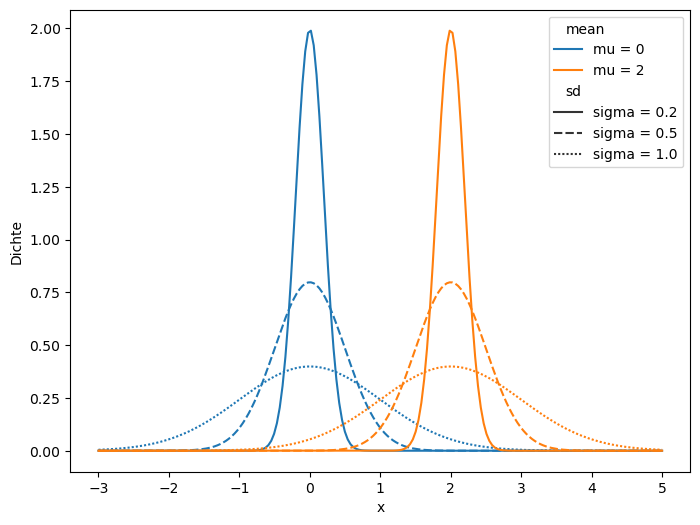

In [6]:
# Define the means and standard deviations
means = [0, 2]
sds = [0.2, 0.5, 1]

# Create a grid of x values
x = np.linspace(-3, 5, 200)

# Create a DataFrame with all combinations of means, sds, and x values
df = pd.DataFrame([(mean, sd, x_val, stats.norm.pdf(x_val, mean, sd)) 
                   for mean in means for sd in sds for x_val in x], 
                  columns=['mean', 'sd', 'x', 'y'])

# Create labels for mean and sd
df['mean'] = 'mu = ' + df['mean'].astype(str)
df['sd'] = 'sigma = ' + df['sd'].astype(str)

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='x', y='y', hue='mean', style='sd')
plt.xlabel('x')
plt.ylabel('Dichte')

Eine Art und Weise, wie eine Normalverteilung entstehen kann, ist die Summe von unabhängigen Zufallsvariablen. Das ist der Inhalt des Zentralen Grenzwertsatzes, der besagt, dass die Summe von unabhängigen Zufallsvariablen, die nicht notwendigerweise normalverteilt sind, für eine große Anzahl von Summanden normalverteilt ist.

Um den Zentralen Grenzwertsatz zu illustrieren, betrachten wir das folgende Spiel.

([<matplotlib.axis.XTick at 0x78abf02ea710>,
 [Text(0, 0, '0'),
  Text(4, 0, '4'),
  Text(8, 0, '8'),
  Text(12, 0, '12'),
  Text(16, 0, '16')])

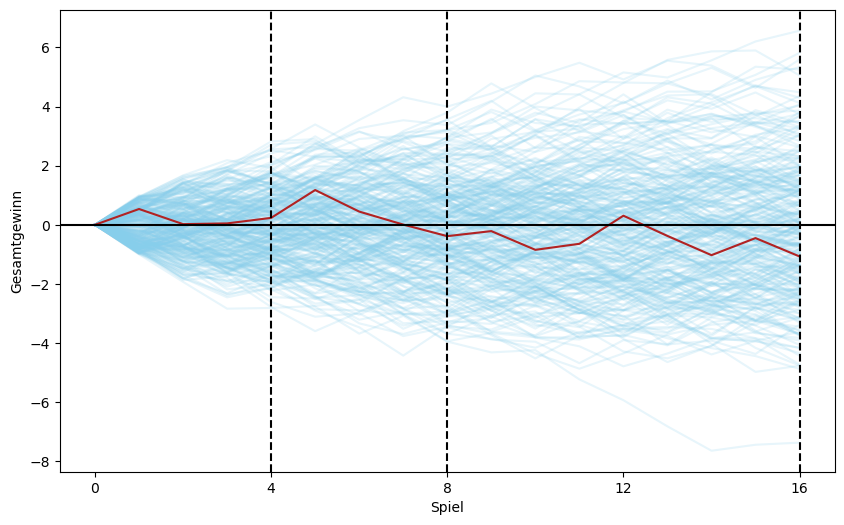

In [7]:
players_n = 300
games_n = 16

# Create a DataFrame similar to expand_grid in R
unif_games = pd.DataFrame(
    np.array(
        np.meshgrid(
            np.arange(1, games_n + 1),
            np.arange(1, players_n + 1)
        )).T.reshape(-1, 2),
    columns=['game', 'player']
)

# Add result column with random uniform values between -1 and 1
unif_games['result'] = np.random.uniform(-1, 1, size=len(unif_games))

# Add initial values for each player
initial_values = pd.DataFrame(
    {'player': np.arange(1, players_n + 1), 'game': 0, 'result': 0})
unif_games = pd.concat([unif_games, initial_values])

# Sort values and calculate running total for each player
unif_games = unif_games.sort_values(['player', 'game'])
unif_games['running_total'] = unif_games.groupby('player')['result'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
for player in unif_games['player'].unique():
    player_data = unif_games[unif_games['player'] == player]
    plt.plot(player_data['game'], player_data['running_total'],
             color='skyblue', alpha=0.2)

# First player
player_data = unif_games[unif_games['player'] == 1]
plt.plot(player_data['game'], player_data['running_total'],
         color='firebrick', label='Player 1')

plt.axhline(0, color='black')

for mark in [4, 8, 16]:
    plt.axvline(x=mark, linestyle='--', color='black')

plt.xlabel('Spiel')
plt.ylabel('Gesamtgewinn')
plt.xticks([0, 4, 8, 12, 16])

/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Running total')

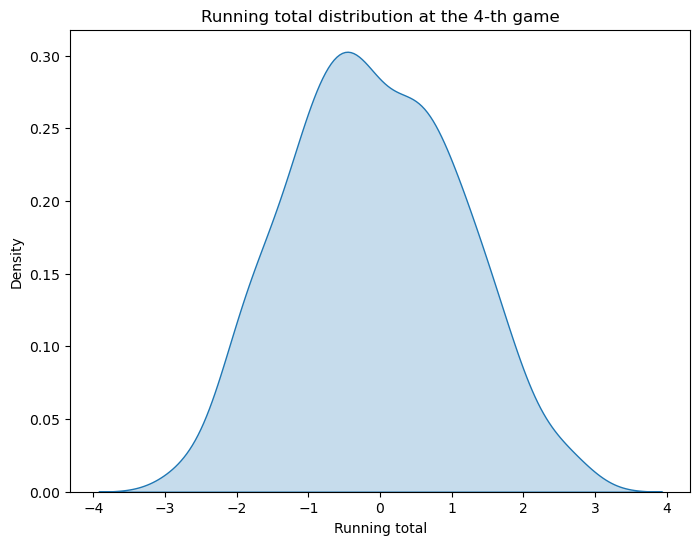

In [8]:
game_4 = unif_games[unif_games['game'] == 4]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_4, x='running_total', fill=True)
plt.title('Running total distribution at the 4-th game')
plt.xlabel('Running total')

/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Running total')

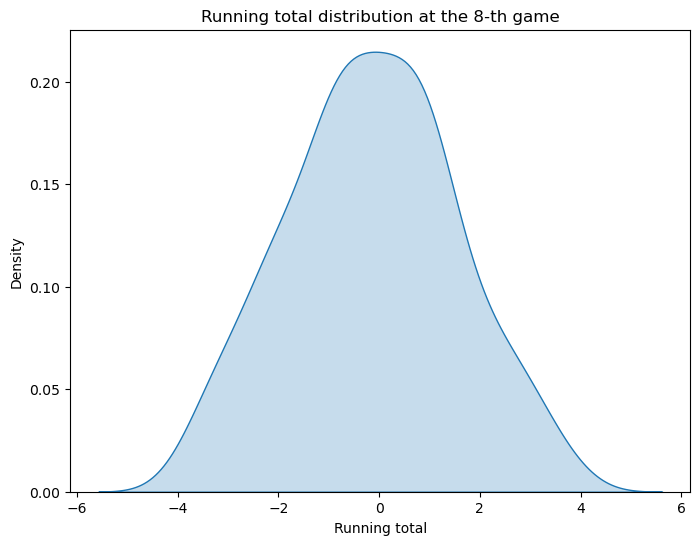

In [9]:
# Erstellen Sie die Dichteschätzung für das 8. Spiel und das 16. Spiel.

game_8 = unif_games[unif_games['game'] == 8]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_8, x='running_total', fill=True)
plt.title('Running total distribution at the 8-th game')
plt.xlabel('Running total')

/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Running total')

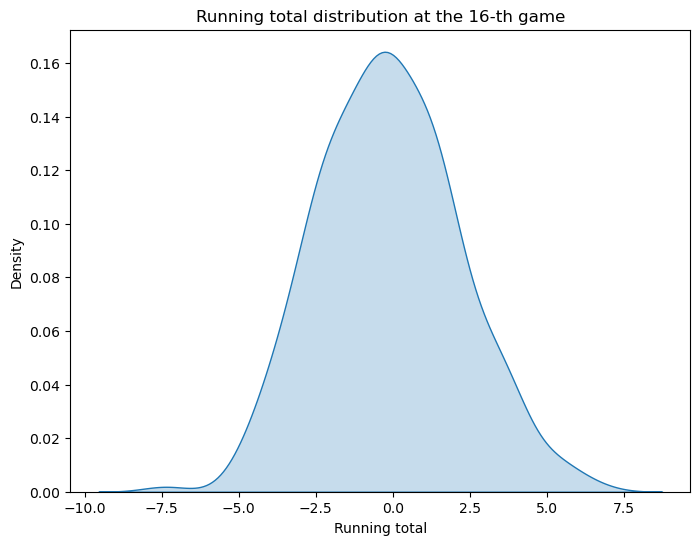

In [10]:
game_16 = unif_games[unif_games['game'] == 16]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=game_16, x='running_total', fill=True)
plt.title('Running total distribution at the 16-th game')
plt.xlabel('Running total')